- In this notebook, we do vesicle detection on microscopy images
- Then construct the data set for modeling
- We use some functions to extract image files from file folder since the files located in indivisual folder

In [ ]:
# Add the src directory to sys.path
import sys
sys.path.append(os.path.abspath('../src'))

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

from utils import *
from batch_run import run_batch_files_templates
import argparse
import pandas as pd
import time
import shutil
import re

In [122]:
import seaborn as sns

### Extract files

In [6]:
directory_path = '../../data/20240503/OriginalImage/Active Learning (Objective Function )_20240503_copy/Wesleyan Confocal Images/Export'

In [9]:
# Iterate through project folders (Project001, Project002)
for folder1 in os.listdir(directory_path):
    folder1_path = os.path.join(directory_path, folder1)
    if os.path.isdir(folder1_path):
        # Iterate through TileScan subfolders 
        for folder2 in os.listdir(folder1_path):
            folder2_path = os.path.join(folder1_path, folder2)
            if os.path.isdir(folder2_path):
                # Iterate through Well subfolders (D, E, F...)
                for folder3 in os.listdir(folder2_path):
                    folder3_path = os.path.join(folder2_path, folder3)
                    if os.path.isdir(folder3_path):
                        # Iterate through column folders(3, 4, ...)
                        for folder4 in os.listdir(folder3_path):
                            folder4_path = os.path.join(folder3_path, folder4)
                            if os.path.isdir(folder4_path):
                                # Iterate through repetions folders (R1, R2, ...)
                                for folder5 in os.listdir(folder4_path):
                                    folder5_path = os.path.join(folder4_path, folder5)
                                    if os.path.isdir(folder5_path):
                                
                                        # Iterate through all files in the subfolder
                                        for file_name in os.listdir(folder5_path):
                                            # Construct the new file name
                                            new_file_name = folder1 + "_" + folder2 + "_" + folder3 + "_" + folder4 + "_"+ folder5 + "_"+ file_name
                                            # Construct the old and new file paths
                                            print(new_file_name)
                                            old_file_path = os.path.join(folder5_path, file_name)
                                            new_file_path = os.path.join(folder5_path, new_file_name)
                                            # Rename the file
                                            os.rename(old_file_path, new_file_path)
                                            print("File renamed:", file_name, "to", new_file_name)

Project002_TileScan 14_K_20_R1_R1.tif
File renamed: R1.tif to Project002_TileScan 14_K_20_R1_R1.tif
Project002_TileScan 14_K_20_R1_MetaData
File renamed: MetaData to Project002_TileScan 14_K_20_R1_MetaData
Project002_TileScan 14_K_20_R3_R3.tif
File renamed: R3.tif to Project002_TileScan 14_K_20_R3_R3.tif
Project002_TileScan 14_K_20_R3_MetaData
File renamed: MetaData to Project002_TileScan 14_K_20_R3_MetaData
Project002_TileScan 14_K_20_R4_R4.tif
File renamed: R4.tif to Project002_TileScan 14_K_20_R4_R4.tif
Project002_TileScan 14_K_20_R4_MetaData
File renamed: MetaData to Project002_TileScan 14_K_20_R4_MetaData
Project002_TileScan 14_K_20_R2_R2.tif
File renamed: R2.tif to Project002_TileScan 14_K_20_R2_R2.tif
Project002_TileScan 14_K_20_R2_MetaData
File renamed: MetaData to Project002_TileScan 14_K_20_R2_MetaData
Project002_TileScan 14_K_18_R1_R1.tif
File renamed: R1.tif to Project002_TileScan 14_K_18_R1_R1.tif
Project002_TileScan 14_K_18_R1_MetaData
File renamed: MetaData to Project002

In [12]:
def copy_tif_files(source_directory, destination_directory):
    # Iterate through all items (files and subdirectories) in the source directory
    for item in os.listdir(source_directory):
        # Construct the full path of the item
        item_path = os.path.join(source_directory, item)
        
        # Check if the item is a file
        if os.path.isfile(item_path):
            # Check if the file is a .tif file
            if item.endswith(".tif"):
                # Construct the destination file path
                destination_file_path = os.path.join(destination_directory, item)
                
                # Copy the file from the source directory to the destination directory
                shutil.copyfile(item_path, destination_file_path)
                print(f"File '{item}' copied successfully.")
        else:
            # If the item is a directory, recursively call the function
            copy_tif_files(item_path, destination_directory)

In [13]:
# Define source and destination directories
source_directory = directory_path
destination_directory = "../../data/20240503/OriginalImage/Active Learning (Objective Function )_20240503_copy/Wesleyan Confocal Images/Files_extract"

# Call the function to copy .tif files from the source directory to the destination directory
copy_tif_files(source_directory, destination_directory)

print("All .tif files copied from", source_directory, "to", destination_directory)

File 'Project002_TileScan 14_K_20_R1_R1.tif' copied successfully.
File 'Project002_TileScan 14_K_20_R3_R3.tif' copied successfully.
File 'Project002_TileScan 14_K_20_R4_R4.tif' copied successfully.
File 'Project002_TileScan 14_K_20_R2_R2.tif' copied successfully.
File 'Project002_TileScan 14_K_18_R1_R1.tif' copied successfully.
File 'Project002_TileScan 14_K_18_R3_R3.tif' copied successfully.
File 'Project002_TileScan 14_K_18_R4_R4.tif' copied successfully.
File 'Project002_TileScan 14_K_18_R2_R2.tif' copied successfully.
File 'Project002_TileScan 14_K_11_R1_R1.tif' copied successfully.
File 'Project002_TileScan 14_K_11_R3_R3.tif' copied successfully.
File 'Project002_TileScan 14_K_11_R4_R4.tif' copied successfully.
File 'Project002_TileScan 14_K_11_R2_R2.tif' copied successfully.
File 'Project002_TileScan 14_K_16_R1_R1.tif' copied successfully.
File 'Project002_TileScan 14_K_16_R3_R3.tif' copied successfully.
File 'Project002_TileScan 14_K_16_R4_R4.tif' copied successfully.
File 'Proj

In [14]:
# Define the directory path
directory_path = destination_directory

# Iterate through all files in the directory
for filename in os.listdir(directory_path):
    # Check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # Split the filename by underscore
        parts = filename.split('_')
        # Remove the last part
        new_filename = '_'.join(parts[:-1]) + '.tif'
        # Construct the old and new file paths
        old_file_path = os.path.join(directory_path, filename)
        new_file_path = os.path.join(directory_path, new_filename)
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print("File renamed:", filename, "to", new_filename)

File renamed: Project001_TileScan 4_E_11_R3_R3.tif to Project001_TileScan 4_E_11_R3.tif
File renamed: Project002_TileScan 14_K_14_R3_R3.tif to Project002_TileScan 14_K_14_R3.tif
File renamed: Project001_TileScan 5_F_19_R3_R3.tif to Project001_TileScan 5_F_19_R3.tif
File renamed: Project002_TileScan 12_J_12_R1_R1.tif to Project002_TileScan 12_J_12_R1.tif
File renamed: Project002_TileScan 12_J_14_R3_R3.tif to Project002_TileScan 12_J_14_R3.tif
File renamed: Project002_TileScan 6_I_8_R1_R1.tif to Project002_TileScan 6_I_8_R1.tif
File renamed: Project002_TileScan 16_L_8_R4_R4.tif to Project002_TileScan 16_L_8_R4.tif
File renamed: Project002_TileScan 14_K_12_R1_R1.tif to Project002_TileScan 14_K_12_R1.tif
File renamed: Project002_TileScan 5_H_16_R2_R2.tif to Project002_TileScan 5_H_16_R2.tif
File renamed: Project001_TileScan 4_E_17_R1_R1.tif to Project001_TileScan 4_E_17_R1.tif
File renamed: Project002_TileScan 9_I_20_R1_R1.tif to Project002_TileScan 9_I_20_R1.tif
File renamed: Project002_T

### Microscopy data processing

In [15]:
template1 = np.load('../Templates/template_656, 640, 71, 71.npy')
template2 = np.load('../Templates/Project_Whole Plate1_1024x1024_200Hz_1%Laser_800gain_B_5_R1.tif_enhance_482_20_56_56.npy')
template3 = np.load('../Templates/1024x1024 - 4 point_no-z-stack - split 5 rows rows only_TileScan 1_C_11_R2.npy')

templates = [template1, template2, template3]

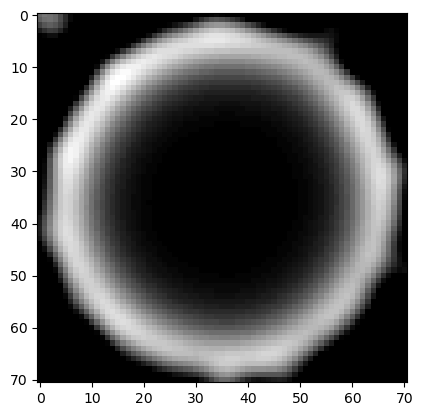

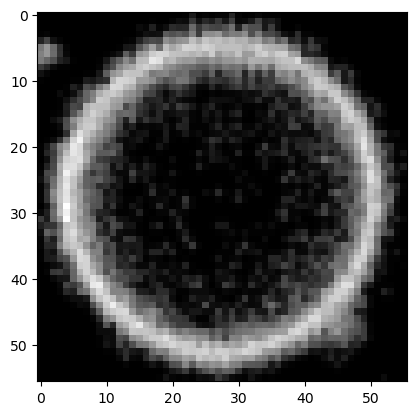

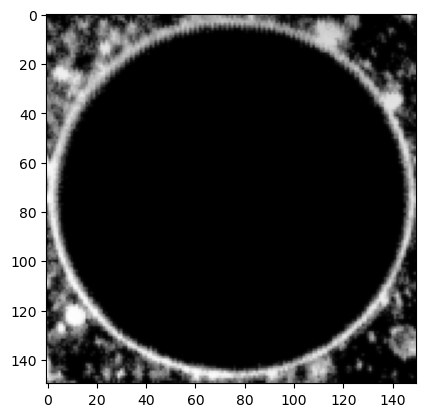

In [16]:
for template in templates:
    plt.imshow(template, cmap='gray')
    plt.show()

In [20]:
file_folder= '../../data/20240503/OriginalImage/Active Learning (Objective Function )_20240503_copy/Wesleyan Confocal Images/Files_extract'
PlateName='Plate_20240505'
# Create the folder if it doesn't exist
folder_path = f"Results_{PlateName}"
os.makedirs(folder_path, exist_ok=True)
# Record the start time
import time
start_time = time.time()
# file_template = load_template(template)
run_batch_files_templates(file_folder, templates, PlateName, \
                min_scale=0.3, max_scale=4, intervals=100, threshold = 0.5)

# Record the end time
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

print("Script execution time:", running_time, "seconds")

1 vesicles found
Project001_TileScan 5_F_10_R4.tif
83 vesicles found
Project001_TileScan 2_E_4_R2.tif
None vesicles found
Project002_TileScan 6_G_000_5_R1.tif
None vesicles found
Project002_TileScan 9_I_8_R2.tif
None vesicles found
Project001_TileScan 4_E_20_R2.tif
2 vesicles found
Project002_TileScan 16_L_6_R1.tif
None vesicles found
Project002_TileScan 6_G_000_18_R3.tif
None vesicles found
Project002_TileScan 16_L_8_R4.tif
1 vesicles found
Project001_TileScan 4_E_16_R3.tif
None vesicles found
Project002_TileScan 12_J_15_R1.tif
None vesicles found
Project001_TileScan 5_F_3_R3.tif
None vesicles found
Project002_TileScan 16_L_4_R4.tif
None vesicles found
Project002_TileScan 6_G_000_14_R3.tif
None vesicles found
Project002_TileScan 5_H_17_R3.tif
None vesicles found
Project002_TileScan 12_J_17_R4.tif
1 vesicles found
Project002_TileScan 4_G_21_R4.tif
1 vesicles found
Project002_TileScan 3_G_7_R2.tif
None vesicles found
Project002_TileScan 12_J_19_R1.tif
None vesicles found
Project001_Tile

### Construct data file

In [22]:
file_path = '../../data/20240503/VesicleDetection/Results_Plate_20240505/Plate_20240505_VesiclesSummary.csv'

In [71]:
df = pd.read_csv(file_path)
df

,filename,num_vesicles,area_vesicles,area_percent
0,Project001_TileScan 5_F_10_R4.tif,1,962.112750,0.000918
1,Project001_TileScan 2_E_4_R2.tif,83,40603.514251,0.038723
2,Project002_TileScan 6_G_000_5_R1.tif,0,0.000000,0.000000
3,Project002_TileScan 9_I_8_R2.tif,0,0.000000,0.000000
4,Project001_TileScan 4_E_20_R2.tif,0,0.000000,0.000000
...,...,...,...,...
844,Project002_TileScan 3_G_15_R1.tif,10,30972.176574,0.029537
845,Project002_TileScan 13_K_9_R1.tif,1,530.929158,0.000506
846,Project002_TileScan 16_L_13_R1.tif,1,5944.678699,0.005669
847,Project002_TileScan 4_G_12_R4.tif,3,4764.225259,0.004544


In [72]:
df['filename'] = df['filename'].str.replace('000_', '')
df

,filename,num_vesicles,area_vesicles,area_percent
0,Project001_TileScan 5_F_10_R4.tif,1,962.112750,0.000918
1,Project001_TileScan 2_E_4_R2.tif,83,40603.514251,0.038723
2,Project002_TileScan 6_G_5_R1.tif,0,0.000000,0.000000
3,Project002_TileScan 9_I_8_R2.tif,0,0.000000,0.000000
4,Project001_TileScan 4_E_20_R2.tif,0,0.000000,0.000000
...,...,...,...,...
844,Project002_TileScan 3_G_15_R1.tif,10,30972.176574,0.029537
845,Project002_TileScan 13_K_9_R1.tif,1,530.929158,0.000506
846,Project002_TileScan 16_L_13_R1.tif,1,5944.678699,0.005669
847,Project002_TileScan 4_G_12_R4.tif,3,4764.225259,0.004544


In [73]:
df['filename'] = df['filename'].apply(lambda x: '_'.join(x.split('_')[2:]))
df

,filename,num_vesicles,area_vesicles,area_percent
0,F_10_R4.tif,1,962.112750,0.000918
1,E_4_R2.tif,83,40603.514251,0.038723
2,G_5_R1.tif,0,0.000000,0.000000
3,I_8_R2.tif,0,0.000000,0.000000
4,E_20_R2.tif,0,0.000000,0.000000
...,...,...,...,...
844,G_15_R1.tif,10,30972.176574,0.029537
845,K_9_R1.tif,1,530.929158,0.000506
846,L_13_R1.tif,1,5944.678699,0.005669
847,G_12_R4.tif,3,4764.225259,0.004544


In [74]:
# Remove only the first underscore in filename column
df['filename'] = df['filename'].apply(lambda x: x.replace('_', '', 1))
df

,filename,num_vesicles,area_vesicles,area_percent
0,F10_R4.tif,1,962.112750,0.000918
1,E4_R2.tif,83,40603.514251,0.038723
2,G5_R1.tif,0,0.000000,0.000000
3,I8_R2.tif,0,0.000000,0.000000
4,E20_R2.tif,0,0.000000,0.000000
...,...,...,...,...
844,G15_R1.tif,10,30972.176574,0.029537
845,K9_R1.tif,1,530.929158,0.000506
846,L13_R1.tif,1,5944.678699,0.005669
847,G12_R4.tif,3,4764.225259,0.004544


In [85]:
df.to_csv('df_20240507.csv', index=False)

In [83]:
df_refine = df.copy()

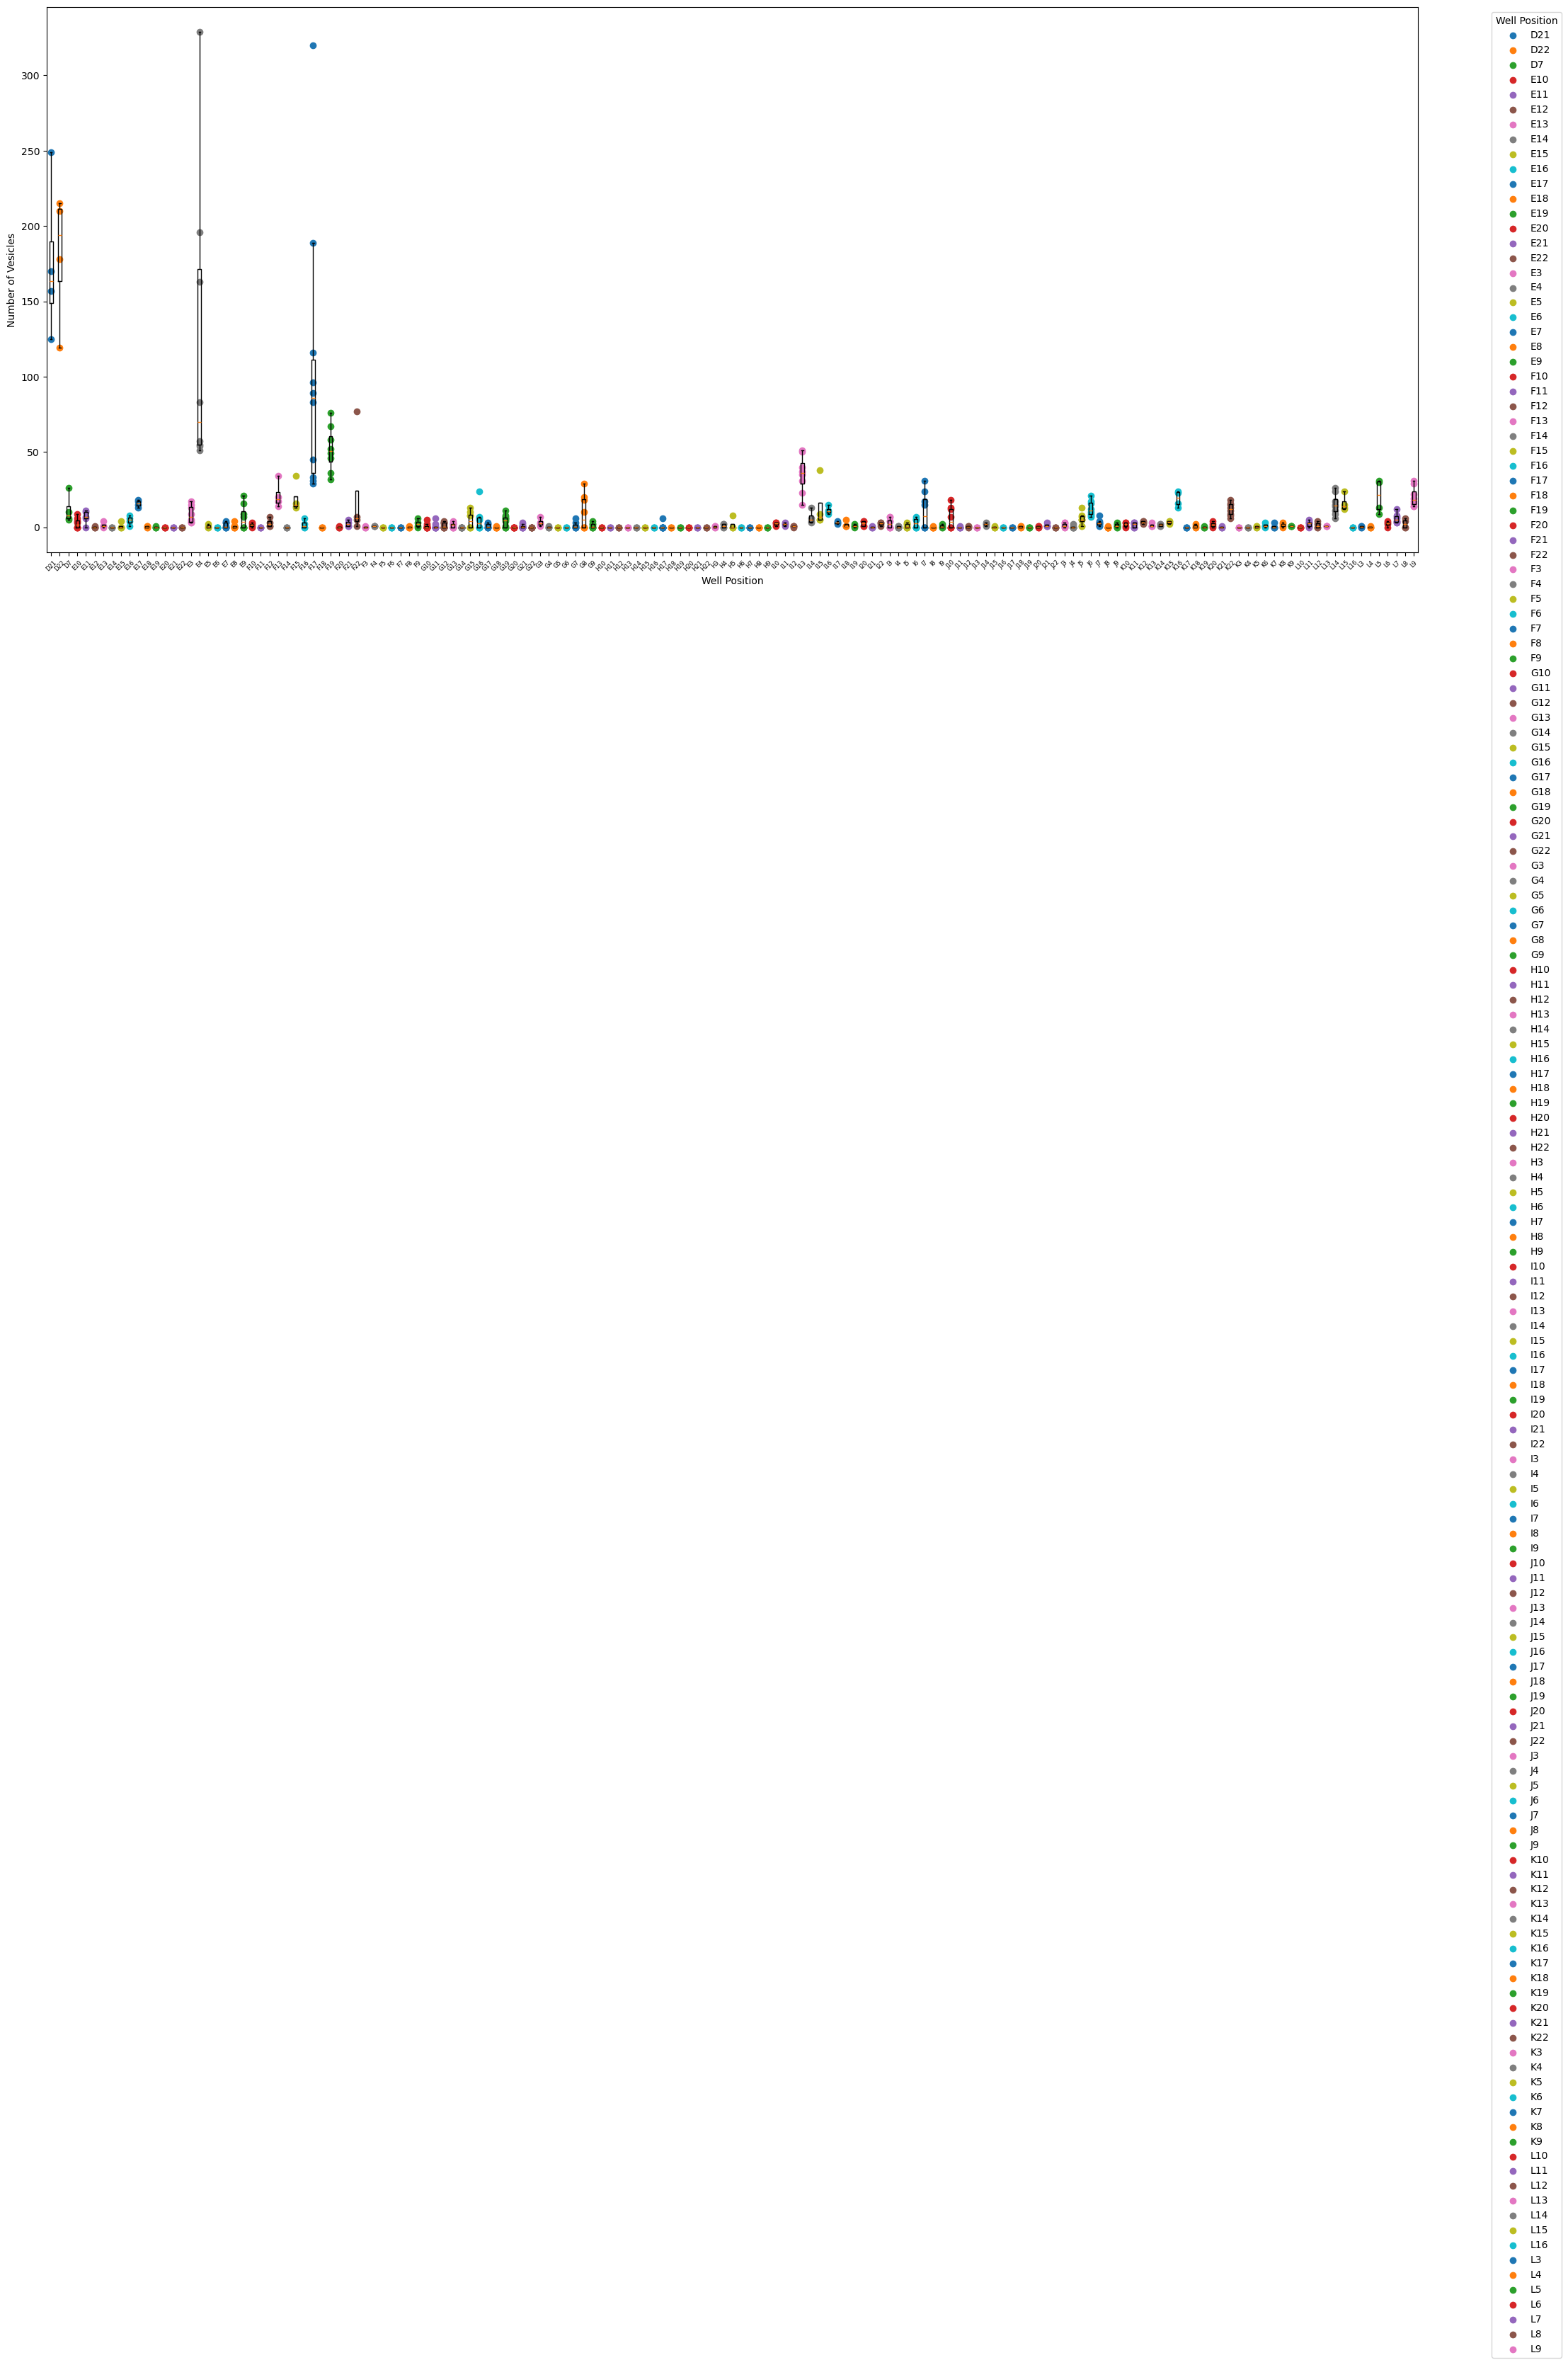

In [82]:
# Extracting the well position from the filename
df_refine['well_position'] = df_refine['filename'].apply(lambda x: x.split('_')[0])

# Grouping by well position
groups = df_refine.groupby('well_position')

# Plotting scatter plot and box plot for each group
fig, ax = plt.subplots(figsize=(25, 10))

positions = range(len(groups))  # Position for each box plot
for i, (key, group) in enumerate(groups):
    ax.scatter([i] * len(group), group['num_vesicles'], label=key)
    ax.boxplot(group['num_vesicles'], positions=[i], widths=0.4, showfliers=False)

ax.set_xticks(range(len(groups)))  # Set tick positions
ax.set_xticklabels(groups.groups.keys(), rotation=45, fontsize=6)
ax.set_xlabel('Well Position')
ax.set_ylabel('Number of Vesicles')
# Move the legend outside the plot
ax.legend(title='Well Position', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [84]:
df_refine

,filename,num_vesicles,area_vesicles,area_percent,well_position
0,F10_R4.tif,1,962.112750,0.000918,F10
1,E4_R2.tif,83,40603.514251,0.038723,E4
2,G5_R1.tif,0,0.000000,0.000000,G5
3,I8_R2.tif,0,0.000000,0.000000,I8
4,E20_R2.tif,0,0.000000,0.000000,E20
...,...,...,...,...,...
844,G15_R1.tif,10,30972.176574,0.029537,G15
845,K9_R1.tif,1,530.929158,0.000506,K9
846,L13_R1.tif,1,5944.678699,0.005669,L13
847,G12_R4.tif,3,4764.225259,0.004544,G12


In [87]:
# Grouping by the part of the filename before the underscore
df_grouped = df_refine.groupby(df_refine['filename'].apply(lambda x: x.split('_')[0]))

# Calculating median values for num_vesicles, area_vesicles, and area_percent
# remember to include numeric_only=True in new version of pandas
df_median = df_grouped.median(numeric_only=True)

# Resetting index to make 'well_position' a column again
df_median.reset_index(inplace=True)

df_median

,filename,num_vesicles,area_vesicles,area_percent
0,D21,163.5,74603.793444,0.071148
1,D22,194.0,81545.535111,0.077768
2,D7,8.0,3138.058362,0.002993
3,E10,1.5,494.408144,0.000472
4,E11,7.0,4718.672166,0.004500
...,...,...,...,...
152,L5,21.5,31225.860180,0.029779
153,L6,2.5,1063.429113,0.001014
154,L7,5.0,6175.585759,0.005889
155,L8,2.0,1350.099443,0.001288


In [89]:
# Define a custom sorting function to sort by alphabetical and numerical order
def custom_sort_key(filename):
    letter = filename[0]
    number = int(filename[1:])
    return (letter, number)

# Sort df_median based on the custom sorting key
df_sorted = df_median.sort_values(by='filename', key=lambda x: x.map(custom_sort_key))

df_sorted

,filename,num_vesicles,area_vesicles,area_percent
2,D7,8.0,3138.058362,0.002993
0,D21,163.5,74603.793444,0.071148
1,D22,194.0,81545.535111,0.077768
16,E3,7.0,2521.128105,0.002404
17,E4,70.0,95330.843675,0.090915
...,...,...,...,...
145,L12,1.0,443.749962,0.000423
146,L13,1.0,1040.652567,0.000992
147,L14,14.5,13055.673670,0.012451
148,L15,14.0,17089.478637,0.016298


In [102]:
# Round 'num_vesicles' to the nearest integer
df_sorted['num_vesicles'] = df_sorted['num_vesicles'].round().astype(int)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted

,filename,num_vesicles,area_vesicles,area_percent
0,D7,8,3138.058362,0.002993
1,D21,164,74603.793444,0.071148
2,D22,194,81545.535111,0.077768
3,E3,7,2521.128105,0.002404
4,E4,70,95330.843675,0.090915
...,...,...,...,...
152,L12,1,443.749962,0.000423
153,L13,1,1040.652567,0.000992
154,L14,14,13055.673670,0.012451
155,L15,14,17089.478637,0.016298


In [103]:
# 52% have no vesicles
len(df_sorted[df_sorted['num_vesicles']==0])/len(df_sorted)

0.5286624203821656

In [104]:
df_sorted.to_csv('df_sorted_20240507.csv', index=False)

In [101]:
df_sorted = pd.read_csv('df_sorted_20240507.csv')

In [95]:
df_sorted['filename'].values

array(['D7', 'D21', 'D22', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18',
       'E19', 'E20', 'E21', 'E22', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
       'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17',
       'F18', 'F19', 'F20', 'F21', 'F22', 'G3', 'G4', 'G5', 'G6', 'G7',
       'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17',
       'G18', 'G19', 'G20', 'G21', 'G22', 'H3', 'H4', 'H5', 'H6', 'H7',
       'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17',
       'H18', 'H19', 'H20', 'H21', 'H22', 'I3', 'I4', 'I5', 'I6', 'I7',
       'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17',
       'I18', 'I19', 'I20', 'I21', 'I22', 'J3', 'J4', 'J5', 'J6', 'J7',
       'J8', 'J9', 'J10', 'J11', 'J12', 'J13', 'J14', 'J15', 'J16', 'J17',
       'J18', 'J19', 'J20', 'J21', 'J22', 'K3', 'K4', 'K5', 'K6', 'K7',
       'K8', 'K9', 'K10', 'K11', 'K12', 'K13', 'K14', 'K15', 

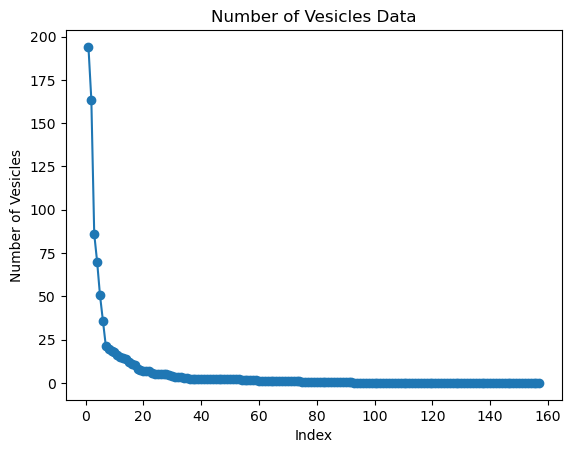

In [96]:
# Sort the DataFrame based on the "area_percent" column
df_plot = df_sorted.sort_values(by="num_vesicles", ascending=False)

# Plot the sorted data
plt.plot(range(1, len(df_plot) + 1),df_plot["num_vesicles"], marker='o')
plt.xlabel("Index")
plt.ylabel("Number of Vesicles")
plt.title("Number of Vesicles Data")
plt.show()

In [105]:
df_sorted

,filename,num_vesicles,area_vesicles,area_percent
0,D7,8,3138.058362,0.002993
1,D21,164,74603.793444,0.071148
2,D22,194,81545.535111,0.077768
3,E3,7,2521.128105,0.002404
4,E4,70,95330.843675,0.090915
...,...,...,...,...
152,L12,1,443.749962,0.000423
153,L13,1,1040.652567,0.000992
154,L14,14,13055.673670,0.012451
155,L15,14,17089.478637,0.016298


In [111]:
df_sorted[df_sorted['filename']=='J13']

,filename,num_vesicles,area_vesicles,area_percent
113,J13,0,0.0,0.0


In [115]:
# Make a copy of df_sorted
df_filled_nan = df_sorted.copy()

# Create a list of all well positions from C3 to K22, and L3 to L16
well_positions = [f"{letter}{number}" for letter in "CDEFGHIJK" for number in range(3, 23)] + [f"L{number}" for number in range(3, 17)]

# Convert well_positions to a set for faster lookup
well_positions_set = set(well_positions)

# Iterate over well_positions and add rows with NaN values for missing positions
filled_rows = []
for position in well_positions:
    if position not in df_filled_nan['filename'].values:
        filled_rows.append({'filename': position, 'num_vesicles': np.nan, 'area_vesicles': np.nan, 'area_percent': np.nan})

# Concatenate filled_rows to df_filled_nan
df_filled_nan = pd.concat([df_filled_nan, pd.DataFrame(filled_rows)], ignore_index=True)

# Sort the DataFrame by filename
# df_filled_nan = df_filled_nan.sort_values(by='filename')

# Reset index
df_filled_nan = df_filled_nan.reset_index(drop=True)
df_filled_nan

,filename,num_vesicles,area_vesicles,area_percent
0,D7,8.0,3138.058362,0.002993
1,D21,164.0,74603.793444,0.071148
2,D22,194.0,81545.535111,0.077768
3,E3,7.0,2521.128105,0.002404
4,E4,70.0,95330.843675,0.090915
...,...,...,...,...
189,D16,NaN,NaN,NaN
190,D17,NaN,NaN,NaN
191,D18,NaN,NaN,NaN
192,D19,NaN,NaN,NaN


In [117]:
df_nan = df_filled_nan.sort_values(by='filename', key=lambda x: x.map(custom_sort_key))
df_nan = df_nan.reset_index(drop=True)
df_nan

,filename,num_vesicles,area_vesicles,area_percent
0,C3,NaN,NaN,NaN
1,C4,NaN,NaN,NaN
2,C5,NaN,NaN,NaN
3,C6,NaN,NaN,NaN
4,C7,NaN,NaN,NaN
...,...,...,...,...
189,L12,1.0,443.749962,0.000423
190,L13,1.0,1040.652567,0.000992
191,L14,14.0,13055.673670,0.012451
192,L15,14.0,17089.478637,0.016298


In [120]:
df_nan_filtered = df_nan[~df_nan['filename'].isin(['L16', 'J13'])]
df_nan_filtered = df_nan_filtered.reset_index(drop=True)
df_nan_filtered

,filename,num_vesicles,area_vesicles,area_percent
0,C3,NaN,NaN,NaN
1,C4,NaN,NaN,NaN
2,C5,NaN,NaN,NaN
3,C6,NaN,NaN,NaN
4,C7,NaN,NaN,NaN
...,...,...,...,...
187,L11,2.0,1552.339470,0.001480
188,L12,1.0,443.749962,0.000423
189,L13,1.0,1040.652567,0.000992
190,L14,14.0,13055.673670,0.012451


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

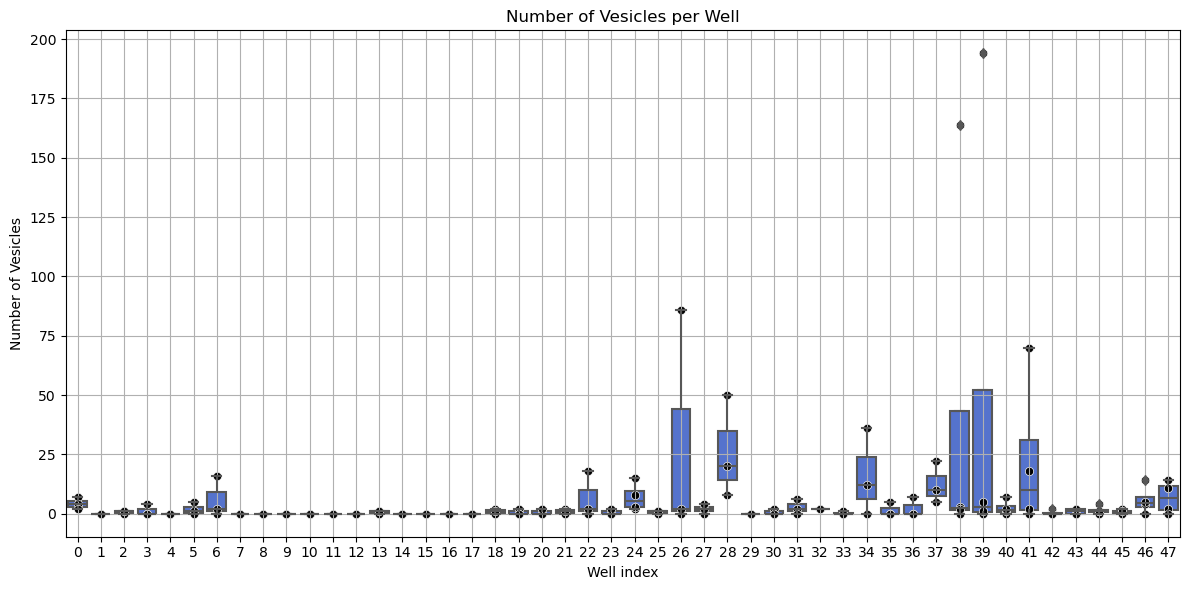

In [126]:
# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_nan_filtered.index % 48, y='num_vesicles', data=df_nan_filtered, color='royalblue')

# Scatter plot without NaN values
sns.scatterplot(x=df_nan_filtered.dropna().index % 48, y='num_vesicles', data=df_nan_filtered.dropna(), color='black', ax=ax)

# Set labels and title
ax.set_xlabel('Well index')
ax.set_ylabel('Number of Vesicles')
ax.set_title('Number of Vesicles per Well')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
df_nan_filtered.to_csv('df_nan_filtered_20240510.csv', index=False)

In [131]:
# Calculate the number of rows in each dataframe
num_rows_per_df = 48

# Split the sorted_df into four dataframes
df1 = df_nan_filtered.iloc[:num_rows_per_df].reset_index(drop=True)
df2 = df_nan_filtered.iloc[num_rows_per_df:num_rows_per_df*2].reset_index(drop=True)
df3 = df_nan_filtered.iloc[num_rows_per_df*2:num_rows_per_df*3].reset_index(drop=True)
df4 = df_nan_filtered.iloc[num_rows_per_df*3:].reset_index(drop=True)

# Concatenate the four dataframes vertically
concatenated_df = pd.concat([df1, df2, df3, df4])
# Exclude non-numeric columns from the calculation
numeric_df = concatenated_df.select_dtypes(include=np.number)

# Calculate the median values along the rows
median_values = numeric_df.groupby(numeric_df.index % num_rows_per_df).median()

# Print the median values
median_values

,num_vesicles,area_vesicles,area_percent
0,4.0,4189.706503,0.003996
1,0.0,0.000000,0.000000
2,1.0,226.980069,0.000216
3,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000
5,1.0,443.749962,0.000423
6,2.0,1293.943474,0.001234
7,0.0,0.000000,0.000000
8,0.0,0.000000,0.000000
9,0.0,0.000000,0.000000


In [152]:
median_values.to_csv('median_values_20240510.csv', index=False)

In [147]:
dispense_df = pd.read_csv('dispense_df_hybrid_20240429.csv')
dispense_df

,decanoic acid (50 mM),decanoic acid (10 mM),decanoic acid (2 mM),decanoate (50 mM),decanoate (10 mM),decanoate (2 mM),decylamine (50 mM),decylamine (10 mM),decylamine (2 mM),decyl trimethylamine (50 mM),decyl trimethylamine (10 mM),decyl trimethylamine (2 mM),decylsulfate (50 mM),decylsulfate (10 mM),decylsulfate (2 mM),decanol (15 mM),decanol (3 mM),monocaprin (10 mM),monocaprin (2 mM)
0,0.0,10.0,0.0,0.0,8.9,0.0,0.0,0.0,3.3,5.6,0.0,0.0,7.0,0.0,0.0,5.3,0.0,6.9,0.0
1,20.0,0.0,0.0,0.0,18.2,0.0,0.0,0.0,6.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,7.5,8.0,0.0
2,14.5,0.0,0.0,0.0,7.5,0.0,0.0,11.4,0.0,0.0,13.7,0.0,0.0,18.4,0.0,0.0,0.0,5.6,0.0
3,0.0,8.7,0.0,0.0,19.8,0.0,0.0,0.0,2.4,0.0,0.0,0.0,11.4,0.0,0.0,6.3,0.0,10.8,0.0
4,12.0,0.0,0.0,0.0,6.9,0.0,6.4,0.0,0.0,10.7,0.0,0.0,0.0,9.7,0.0,10.2,0.0,4.1,0.0
5,0.0,17.2,0.0,0.0,11.3,0.0,0.0,16.6,0.0,4.8,0.0,0.0,0.0,17.3,0.0,6.0,0.0,0.0,14.8
6,4.9,0.0,0.0,0.0,9.1,0.0,0.0,0.0,19.5,0.0,17.5,0.0,6.2,0.0,0.0,15.5,0.0,7.4,0.0
7,4.2,0.0,0.0,0.0,4.9,0.0,0.0,8.4,0.0,6.6,0.0,0.0,0.0,16.8,0.0,10.3,0.0,5.7,0.0
8,0.0,13.8,0.0,0.0,0.0,17.1,0.0,12.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,20.0,0.0,7.7,0.0
9,6.5,0.0,0.0,0.0,0.0,0.0,10.1,0.0,0.0,0.0,0.0,12.5,0.0,12.2,0.0,12.5,0.0,5.4,0.0


In [149]:
# List of solutes you want to extract
solutes = ['decanoic acid', 'decanoate', 'decylamine', 'decyl trimethylamine', 'decylsulfate', 'decanol', 'monocaprin']

# Create a new DataFrame to store the results
result_df = pd.DataFrame()

for solute in solutes:
    solute_columns = [col for col in dispense_df.columns if solute in col]
    concentrations = [float(re.search(r'\d+', col).group()) for col in solute_columns]
    total_mass_column = 'Total_' + solute + '_Mass'
    result_df[total_mass_column] = (dispense_df[solute_columns] * concentrations).sum(axis=1)

# Display the new DataFrame with the added columns
# Divide all column values by 200
result_df = result_df.div(200)
result_df

,Total_decanoic acid_Mass,Total_decanoate_Mass,Total_decylamine_Mass,Total_decyl trimethylamine_Mass,Total_decylsulfate_Mass,Total_decanol_Mass,Total_monocaprin_Mass
0,0.500,0.445,0.033,1.400,1.750,0.3975,0.345
1,5.000,0.910,0.060,0.000,1.125,0.1125,0.400
2,3.625,0.375,0.570,0.685,0.920,0.0000,0.280
3,0.435,0.990,0.024,0.000,2.850,0.4725,0.540
4,3.000,0.345,1.600,2.675,0.485,0.7650,0.205
5,0.860,0.565,0.830,1.200,0.865,0.4500,0.148
6,1.225,0.455,0.195,0.875,1.550,1.1625,0.370
7,1.050,0.245,0.420,1.650,0.840,0.7725,0.285
8,0.690,0.171,0.600,0.000,1.750,1.5000,0.385
9,1.625,0.000,2.525,0.125,0.610,0.9375,0.270


In [151]:
df_combine = pd.concat([result_df, median_values], axis=1)
df_combine

,Total_decanoic acid_Mass,Total_decanoate_Mass,Total_decylamine_Mass,Total_decyl trimethylamine_Mass,Total_decylsulfate_Mass,Total_decanol_Mass,Total_monocaprin_Mass,num_vesicles,area_vesicles,area_percent
0,0.500,0.445,0.033,1.400,1.750,0.3975,0.345,4.0,4189.706503,0.003996
1,5.000,0.910,0.060,0.000,1.125,0.1125,0.400,0.0,0.000000,0.000000
2,3.625,0.375,0.570,0.685,0.920,0.0000,0.280,1.0,226.980069,0.000216
3,0.435,0.990,0.024,0.000,2.850,0.4725,0.540,0.0,0.000000,0.000000
4,3.000,0.345,1.600,2.675,0.485,0.7650,0.205,0.0,0.000000,0.000000
5,0.860,0.565,0.830,1.200,0.865,0.4500,0.148,1.0,443.749962,0.000423
6,1.225,0.455,0.195,0.875,1.550,1.1625,0.370,2.0,1293.943474,0.001234
7,1.050,0.245,0.420,1.650,0.840,0.7725,0.285,0.0,0.000000,0.000000
8,0.690,0.171,0.600,0.000,1.750,1.5000,0.385,0.0,0.000000,0.000000
9,1.625,0.000,2.525,0.125,0.610,0.9375,0.270,0.0,0.000000,0.000000


In [153]:
df_combine.to_csv('df_combine_20240510.csv', index=False)

In [2]:
import pandas as pd
df_combine = pd.read_csv('df_combine_20240510.csv')
df_concentration = df_combine.iloc[:,0:7]
df_concentration.to_csv('df_concentration_20240510.csv', index=False)

In [154]:
# See next for model construction